In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Same epsilon for the 2 players : Q-learning

## 1- Importation and cleaning

In [4]:
df = pd.read_csv('../final_data/epsilon_q2.csv')
# Function to convert string to list of two numbers using regular expressions
def extract_numbers(text):
    numbers = re.findall(r'-?\d+\.?\d*(?:e[-+]?\d+)?', text)
    return [float(num) for num in numbers]

# Apply the function to the column and convert the strings into lists of two numbers
df['Rewards'] = df['Rewards'].apply(extract_numbers)
df['Prices'] = df['Prices'].apply(extract_numbers)
df['Epsilon'] = df['Epsilon'].apply(extract_numbers)

#Convert into int if digit
df['Iteration'] = df['Iteration'].apply(lambda x: int(x) if str(x).isdigit() else x)


#Separate the profits, prices and Epsilon of each player
df[['Reward1', 'Reward2']] = df['Rewards'].apply(lambda x: pd.Series(x))
df[['Price1', 'Price2']] = df['Prices'].apply(lambda x: pd.Series(x))
df[['Epsilon1', 'Epsilon2']] = df['Epsilon'].apply(lambda x: pd.Series(x))

#Drop the useless columns
df = df.drop(columns=['Rewards', 'Prices', 'Epsilon'])

/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_955/3552634197.py:17: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df[['Reward1', 'Reward2']] = df['Rewards'].apply(lambda x: pd.Series(x))
/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_955/3552634197.py:18: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df[['Price1', 'Price2']] = df['Prices'].apply(lambda x: pd.Series(x))
/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_955/3552634197.py:19: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df[['Epsilon1', 'Epsilon2']] = df['Epsilon'].apply(lambda x: pd.Series(x))


In [5]:
df

,Iteration,beta,index,Reward1,Reward2,Price1,Price2,Epsilon1,Epsilon2
0,0,0.002500,1,0.200833,0.280442,1.61950,1.46350,1.000000e+00,1.000000e+00
1,10000,0.002500,1,0.191614,0.294219,1.65850,1.46350,1.392271e-11,1.392271e-11
2,20000,0.002500,1,0.191614,0.294219,1.65850,1.46350,1.933578e-22,1.933578e-22
3,30000,0.002500,1,0.191614,0.294219,1.65850,1.46350,2.685342e-33,2.685342e-33
4,40000,0.002500,1,0.191614,0.294219,1.65850,1.46350,3.729388e-44,3.729388e-44
...,...,...,...,...,...,...,...,...,...
190375,9970000,0.000025,10,0.169348,0.374261,1.85350,1.54150,5.650817e-109,5.650817e-109
190376,9980000,0.000025,10,0.292024,0.362491,1.85350,1.77550,4.400861e-109,4.400861e-109
190377,9990000,0.000025,10,0.372947,0.297938,1.85350,1.93150,3.427394e-109,3.427394e-109
190378,10000000,0.000025,10,0.228329,0.384294,1.85350,1.65850,2.669257e-109,2.669257e-109


### Separate the dataframe into 2: final for studying the final results and iterations for learning curves

In [6]:
lc_df = df[~(df['Iteration']=='last 100 iterations mean')]

In [7]:
fin_df = df[df['Iteration']=='last 100 iterations mean']

## 2- Learning curves

In [8]:
df['beta'].unique()

array([2.5e-03, 7.5e-07, 7.5e-04, 5.0e-07, 5.0e-05, 7.5e-05, 1.0e-03,
       5.0e-03, 7.5e-06, 5.0e-06, 7.5e-03, 2.5e-04, 5.0e-04, 2.5e-06,
       2.5e-07, 1.0e-07, 1.0e-04, 1.0e-05, 2.5e-05])

In [9]:
df_beta = lc_df[lc_df['beta']==1.0e-05]
df_beta

,Iteration,beta,index,Reward1,Reward2,Price1,Price2,Epsilon1,Epsilon2
170340,0,0.00001,1,0.200833,0.280442,1.6195,1.4635,1.000000e+00,1.000000e+00
170341,10000,0.00001,1,0.265054,0.362441,1.8145,1.6975,9.048465e-01,9.048465e-01
170342,20000,0.00001,1,0.230897,0.303187,1.6585,1.5415,8.187389e-01,8.187389e-01
170343,30000,0.00001,1,0.398695,0.192734,1.6195,1.8925,7.408256e-01,7.408256e-01
170344,40000,0.00001,1,0.387412,0.277469,1.8145,1.9315,6.703267e-01,6.703267e-01
...,...,...,...,...,...,...,...,...,...
180354,9960000,0.00001,10,0.292002,0.292002,1.6585,1.6585,5.549757e-44,5.549757e-44
180355,9970000,0.00001,10,0.292002,0.292002,1.6585,1.6585,5.021628e-44,5.021628e-44
180356,9980000,0.00001,10,0.292002,0.292002,1.6585,1.6585,4.543756e-44,4.543756e-44
180357,9990000,0.00001,10,0.292002,0.292002,1.6585,1.6585,4.111361e-44,4.111361e-44


In [10]:
mean_df = df_beta.groupby('Iteration')[['Reward1', 'Reward2', 'Price1', 'Price2', 'Epsilon1', 'Epsilon2', 'beta']].mean().reset_index()
mean_df

,Iteration,Reward1,Reward2,Price1,Price2,Epsilon1,Epsilon2,beta
0,0,0.217750,0.306410,1.7326,1.5844,1.000000e+00,1.000000e+00,0.00001
1,10000,0.243724,0.313169,1.7209,1.6234,9.048465e-01,9.048465e-01,0.00001
2,20000,0.272786,0.306663,1.7560,1.6897,8.187389e-01,8.187389e-01,0.00001
3,30000,0.274883,0.291112,1.7170,1.6858,7.408256e-01,7.408256e-01,0.00001
4,40000,0.266844,0.318194,1.7872,1.6897,6.703267e-01,6.703267e-01,0.00001
...,...,...,...,...,...,...,...,...
996,9960000,0.293991,0.297756,1.7131,1.7170,5.549757e-44,5.549757e-44,0.00001
997,9970000,0.294896,0.318549,1.7560,1.7248,5.021628e-44,5.021628e-44,0.00001
998,9980000,0.281190,0.331617,1.7872,1.7248,4.543756e-44,4.543756e-44,0.00001
999,9990000,0.293991,0.297756,1.7131,1.7170,4.111361e-44,4.111361e-44,0.00001


In [12]:
def plot_learning_curve(mean_df, nb_iter):
    # Assuming df contains 'Rewards' and 'Iteration' columns
    plt.figure(figsize=(10, 6))

    # Plot rewards for each player
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<nb_iter], mean_df['Reward1'][mean_df['Iteration']<nb_iter],alpha=0.5, label='Player 1')
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<nb_iter], mean_df['Reward2'][mean_df['Iteration']<nb_iter],alpha=0.5, label='Player 2')

    # Customize the plot
    plt.title('Learning Curves')
    plt.xlabel('Iteration')
    plt.ylabel('Rewards')
    plt.legend()
    plt.grid(True)
    plt.show()

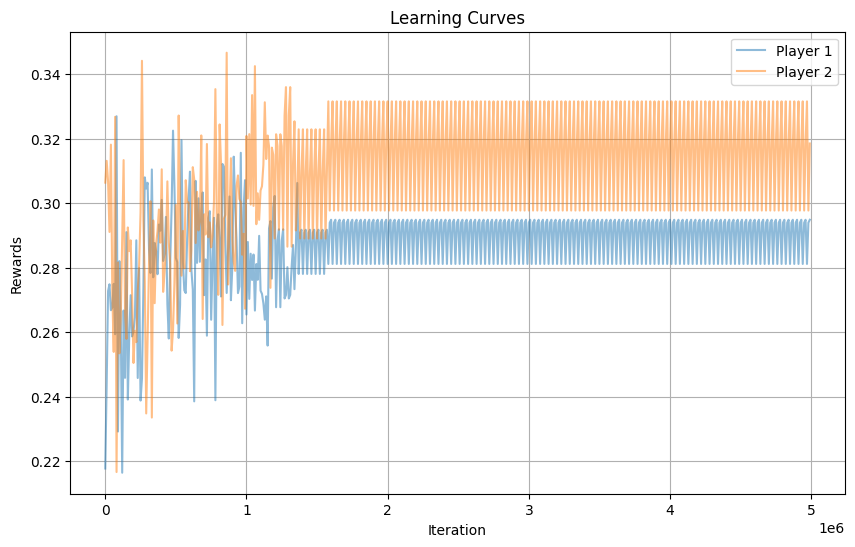

In [13]:
plot_learning_curve(mean_df, 5*(10**(6)))

## 3- Final rewards and prices as a function of beta

In [14]:
fin_df

,Iteration,beta,index,Reward1,Reward2,Price1,Price2,Epsilon1,Epsilon2
1001,last 100 iterations mean,0.002500,1,0.240028,0.252429,1.65850,1.61170,0.000000e+00,0.000000e+00
2003,last 100 iterations mean,0.002500,2,0.328147,0.266707,1.71154,1.79734,0.000000e+00,0.000000e+00
3005,last 100 iterations mean,0.002500,3,0.245414,0.332801,1.82230,1.67098,0.000000e+00,0.000000e+00
4007,last 100 iterations mean,0.002500,4,0.257962,0.295304,1.73416,1.68112,0.000000e+00,0.000000e+00
5009,last 100 iterations mean,0.002500,5,0.289896,0.250192,1.58050,1.63900,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
186371,last 100 iterations mean,0.000025,6,0.276475,0.276642,1.66357,1.66474,2.672563e-109,2.672563e-109
187373,last 100 iterations mean,0.000025,7,0.274270,0.287037,1.68814,1.67410,2.672563e-109,2.672563e-109
188375,last 100 iterations mean,0.000025,8,0.257217,0.314209,1.75990,1.68970,2.672563e-109,2.672563e-109
189377,last 100 iterations mean,0.000025,9,0.304350,0.271275,1.68190,1.72363,2.672563e-109,2.672563e-109


In [17]:
def repart_rewards(df_beta):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    
    # Sort the dataframe by 'beta' column in ascending order
    df_beta_sorted = df_beta.sort_values(by='beta')

    
    sns.boxplot(x='beta', y=df_beta_sorted['Reward1'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    sns.boxplot(x='beta', y=df_beta_sorted['Reward2'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    
    plt.xlabel('Beta')
    plt.ylabel('Final rewards')
    plt.title('Box Plot of final rewards grouped by $\\beta$')
    
    print(df_beta_sorted['beta'].unique())
      # Define custom tick labels for the x-axis
    beta_values = df_beta_sorted['beta'].unique()
    beta_labels = ['{:.1e}'.format(beta) for beta in beta_values]
    
    # Set custom tick positions and labels on the x-axis
    plt.xticks(ticks=range(len(beta_values)), labels=beta_labels, rotation=45)
    plt.show()

[1.0e-07 2.5e-07 5.0e-07 7.5e-07 2.5e-06 5.0e-06 7.5e-06 1.0e-05 2.5e-05
 5.0e-05 7.5e-05 1.0e-04 2.5e-04 5.0e-04 7.5e-04 1.0e-03 2.5e-03 5.0e-03
 7.5e-03]


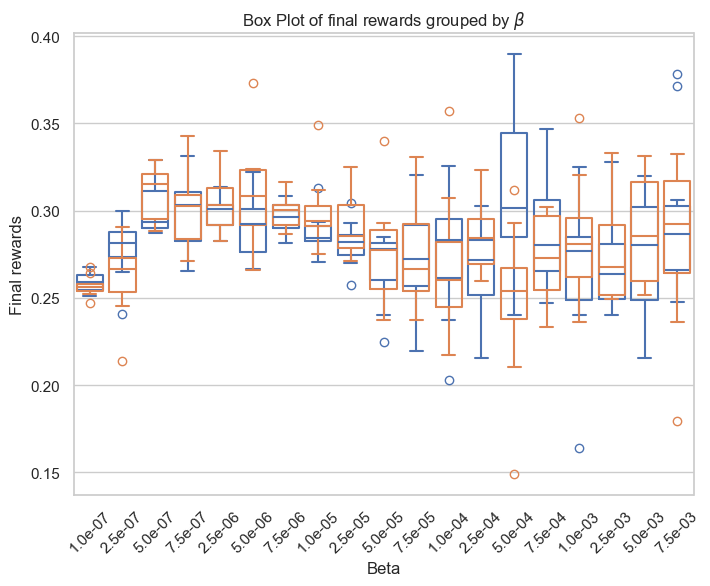

In [18]:
repart_rewards(fin_df)